In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline

In [2]:
from sklearn.preprocessing import (
    OrdinalEncoder,
    OneHotEncoder,
    PowerTransformer,
    LabelEncoder,
)

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("./Visadataset.csv")

In [5]:
df.drop(columns=["case_id"], axis=1, inplace=True)

In [6]:
df["no_of_employees"] = df["no_of_employees"].apply(lambda x: abs(x))

In [7]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [8]:
from datetime import datetime

df["company_age"] = datetime.now().year - df["yr_of_estab"]

In [9]:
df.drop(columns=["yr_of_estab"], inplace=True)

In [10]:
train_set, test_set = train_test_split(df, test_size=0.25)

In [11]:
test_set["case_status"].value_counts()

case_status
Certified    4243
Denied       2127
Name: count, dtype: int64

In [12]:
train_set["case_status"].value_counts()

case_status
Certified    12775
Denied        6335
Name: count, dtype: int64

In [13]:
train_features = train_set.drop(columns=["case_status"])

In [14]:
train_target = train_set["case_status"]

In [15]:
test_features = test_set.drop(columns=["case_status"])

In [16]:
test_target = test_set["case_status"]

In [17]:
train_features.head(4)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,company_age
1516,Asia,Bachelor's,Y,N,42,South,111423.13,Year,Y,40
18630,Europe,Doctorate,Y,N,627,West,9295.78,Year,Y,13
23759,Asia,Bachelor's,Y,N,26982,Island,86446.20,Year,Y,21
13293,Europe,Doctorate,N,N,3571,Northeast,70330.13,Year,Y,31


In [18]:
numerical_cols = train_features.select_dtypes(include=["int", "float"]).columns

In [19]:
numerical_cols

Index(['no_of_employees', 'prevailing_wage', 'company_age'], dtype='object')

In [20]:
categorical_cols = [col for col in train_features.columns if col not in numerical_cols]

In [21]:
categorical_cols

['continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position']

In [22]:
for col in train_features[numerical_cols].columns:
    if (df[col] < 0).any():
        print(col)

In [23]:
le = LabelEncoder()

In [24]:
le_transformed_target = le.fit_transform(train_target)

In [25]:
le_transformed_target

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
le.classes_

array(['Certified', 'Denied'], dtype=object)

In [27]:
dict(zip(le_transformed_target, le.classes_))

{0: 'Denied'}

In [28]:
ohe = ["continent", "region_of_employment", "unit_of_wage"]

In [29]:
ohe_trf = OneHotEncoder(dtype=int, sparse_output=False, drop="first")

In [30]:
ohe_transformed_train_features = ohe_trf.fit_transform(train_features[ohe])

In [31]:
ohe_transformed_test_features = ohe_trf.transform(test_features[ohe])

In [32]:
ohe_transformed_train_features

array([[1, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       ...,
       [1, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1]])

In [33]:
ohe_transformed_test_features

array([[0, 1, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [34]:
ohe_trf.get_feature_names_out()

array(['continent_Asia', 'continent_Europe', 'continent_North America',
       'continent_Oceania', 'continent_South America',
       'region_of_employment_Midwest', 'region_of_employment_Northeast',
       'region_of_employment_South', 'region_of_employment_West',
       'unit_of_wage_Month', 'unit_of_wage_Week', 'unit_of_wage_Year'],
      dtype=object)

In [35]:
ohe_trf.categories_

[array(['Africa', 'Asia', 'Europe', 'North America', 'Oceania',
        'South America'], dtype=object),
 array(['Island', 'Midwest', 'Northeast', 'South', 'West'], dtype=object),
 array(['Hour', 'Month', 'Week', 'Year'], dtype=object)]

In [36]:
ohe_trf.get_params()

{'categories': 'auto',
 'drop': 'first',
 'dtype': int,
 'feature_name_combiner': 'concat',
 'handle_unknown': 'error',
 'max_categories': None,
 'min_frequency': None,
 'sparse_output': False}

In [37]:
oe = [
    "education_of_employee",
    "has_job_experience",
    "requires_job_training",
    "full_time_position",
]

In [38]:
oe_trf = OrdinalEncoder(
    dtype="int",
    categories=[
        ["High School", "Bachelor's", "Master's", "Doctorate"],
        ["Y", "N"],
        ["Y", "N"],
        ["Y", "N"],
    ],
)

In [39]:
oe_transformed_train_features = oe_trf.fit_transform(train_features[oe])

In [40]:
oe_trf.get_feature_names_out()

array(['education_of_employee', 'has_job_experience',
       'requires_job_training', 'full_time_position'], dtype=object)

In [41]:
oe_trf.categories_

[array(['High School', "Bachelor's", "Master's", 'Doctorate'], dtype=object),
 array(['Y', 'N'], dtype=object),
 array(['Y', 'N'], dtype=object),
 array(['Y', 'N'], dtype=object)]

In [42]:
train_features.columns

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'region_of_employment',
       'prevailing_wage', 'unit_of_wage', 'full_time_position', 'company_age'],
      dtype='object')

In [43]:
len(train_features.columns)

10

In [44]:
oe

['education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'full_time_position']

In [45]:
ohe

['continent', 'region_of_employment', 'unit_of_wage']

In [46]:
remaining_cols = list(set(train_features.columns) - set(oe + ohe))
remaining_cols

['no_of_employees', 'prevailing_wage', 'company_age']

In [47]:
pt = PowerTransformer(method="yeo-johnson")

In [48]:
remaining_transformed_train_features = pt.fit_transform(train_features[remaining_cols])

In [49]:
remaining_transformed_train_features.shape

(19110, 3)

In [50]:
oe_transformed_train_features.shape

(19110, 4)

In [51]:
ohe_transformed_train_features.shape

(19110, 12)

In [52]:
import numpy as np

In [53]:
final_train_data = np.concatenate(
    (
        ohe_transformed_train_features,
        oe_transformed_train_features,
        remaining_transformed_train_features,
    ),
    axis=1,
)

In [54]:
pd.DataFrame(final_train_data).head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,-3.032013,0.758827,0.455613
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,1.0,0.0,-0.857991,-1.354130,-1.527573
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2.088503,0.393078,-0.552993


In [55]:
from sklearn.compose import ColumnTransformer

In [56]:
pd.DataFrame(
    ColumnTransformer(
        transformers=[
            ("one_hot_encoder", ohe_trf, ohe),
            ("ordinal_encoder", oe_trf, oe),
            ("power_transformer", pt, remaining_cols),
        ],
        remainder="passthrough",
    ).fit_transform(train_features)
).head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,-3.032013,0.758827,0.455613
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,1.0,0.0,-0.857991,-1.354130,-1.527573
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2.088503,0.393078,-0.552993


<Axes: ylabel='Density'>

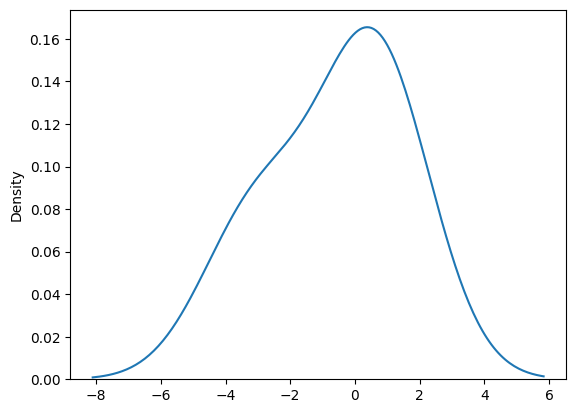

In [57]:
sns.kdeplot(remaining_transformed_train_features[0])

In [58]:
pd.DataFrame(remaining_transformed_train_features[0]).skew()

0   -1.691768
dtype: float64

<Axes: ylabel='Density'>

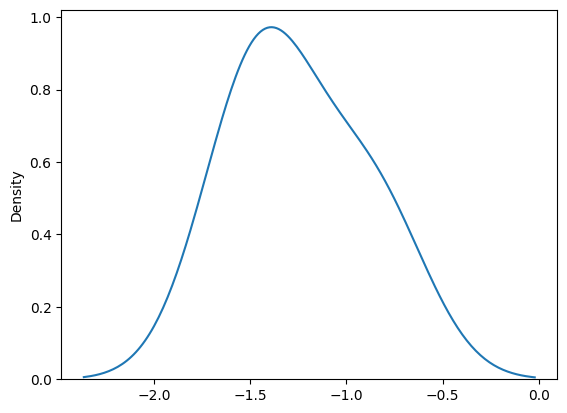

In [59]:
sns.kdeplot(remaining_transformed_train_features[1])

In [60]:
pd.DataFrame(remaining_transformed_train_features[1]).skew()

0    1.259438
dtype: float64

<Axes: ylabel='Density'>

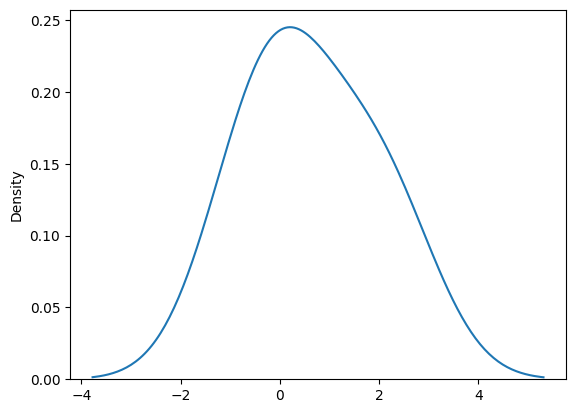

In [61]:
sns.kdeplot(remaining_transformed_train_features[2])

In [62]:
pd.DataFrame(remaining_transformed_train_features[2]).skew()

0    0.810611
dtype: float64